In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_excel('iris.xls')

In [ ]:
#Data Understanding

In [4]:
data.shape

(150, 5)

In [5]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Data Pre-Processing

In [8]:
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


[]

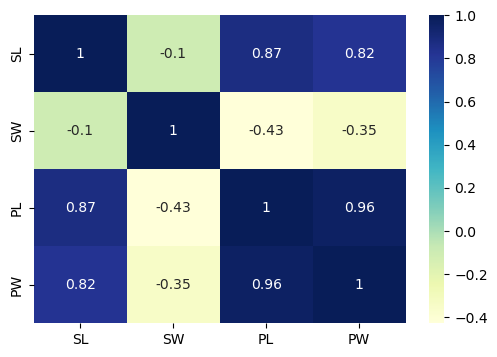

In [10]:
corr_matrix=data.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.plot()

In [11]:
data['Classification'].nunique()

3

In [12]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [13]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [14]:
#Finding missing values and replacing it with median/mode/mean basis the distribution of data
data.isna().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

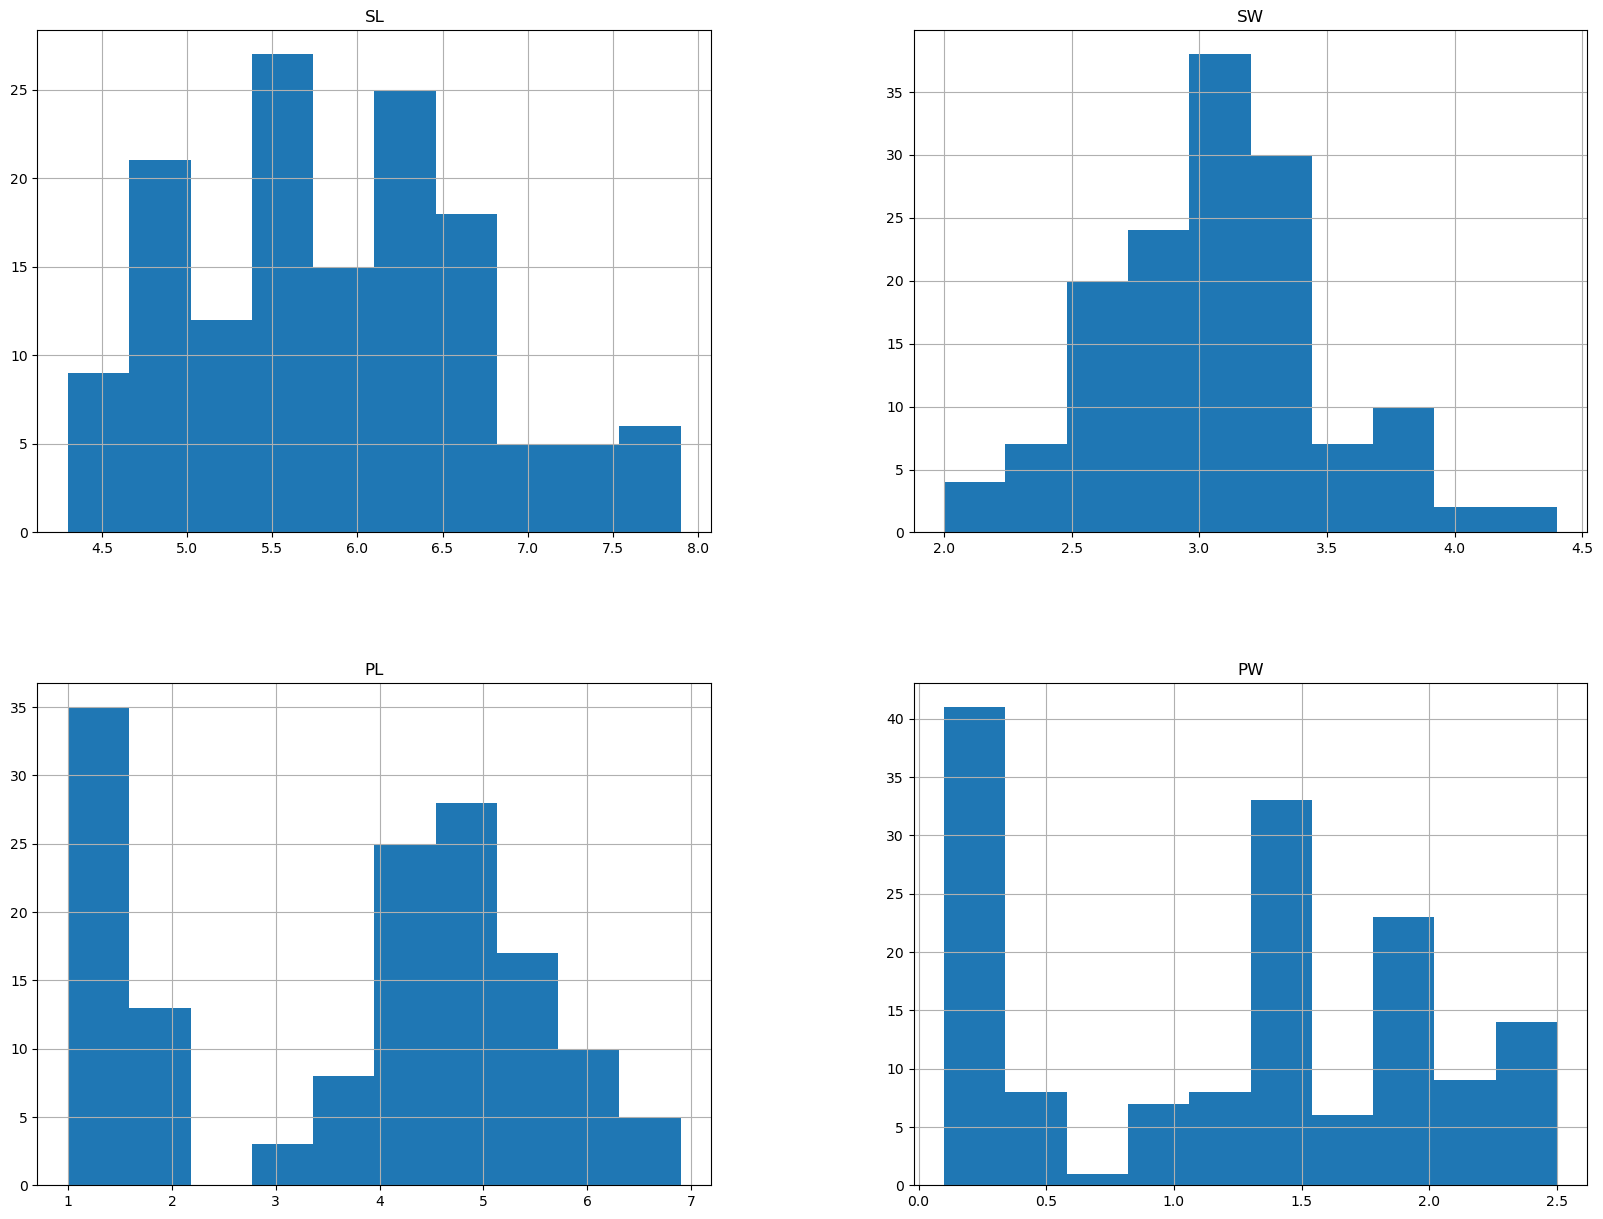

In [15]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))

In [16]:
col =list(data.columns)

In [17]:
col

['SL', 'SW', 'PL', 'PW', 'Classification']

In [18]:
    for col_name in col:
        if data[col_name].dtypes=='object':
            data[col_name]=data[col_name].fillna(data[col_name].mode()[0])
        else:
            data[col_name]=data[col_name].fillna(data[col_name].median())

In [19]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

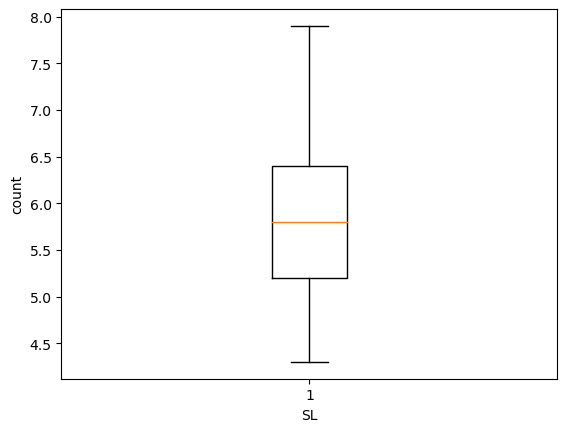

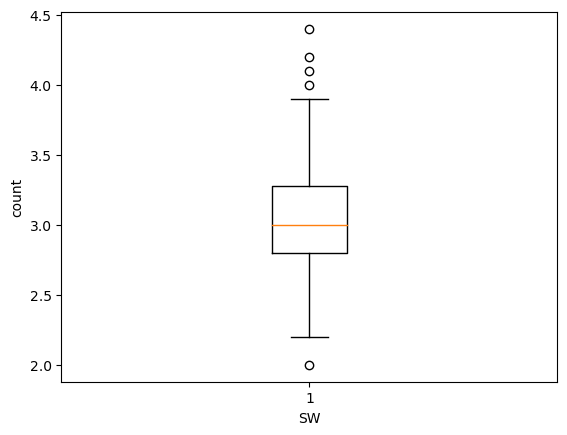

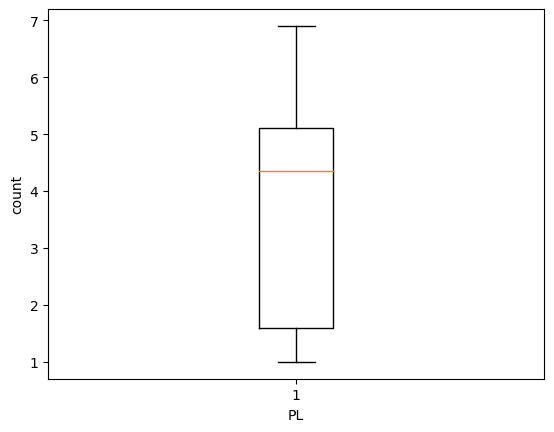

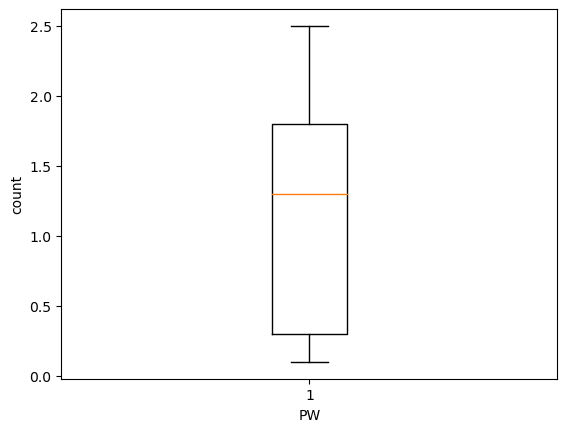

In [20]:
for col_name in col:
    if (data[col_name].dtypes=='int' or data[col_name].dtypes=='float'):
        plt.boxplot([data[col_name]])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [21]:
#To manage the outliers
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [22]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [23]:
#Finding IQR
IQR=Q3-Q1
print("IQR",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim",low_lim)
print("up_lim",up_lim)

IQR 0.4500000000000002
low_lim 2.1249999999999996
up_lim 3.9250000000000003


In [24]:
#Findng Outlier values and storing in a list
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [25]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [26]:
ind1=data['SW']< low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [27]:
data1=data

In [28]:
data=data.drop([60])

In [29]:
ind1=data['SW']> up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [30]:
data=data.drop([14, 15, 32, 33])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


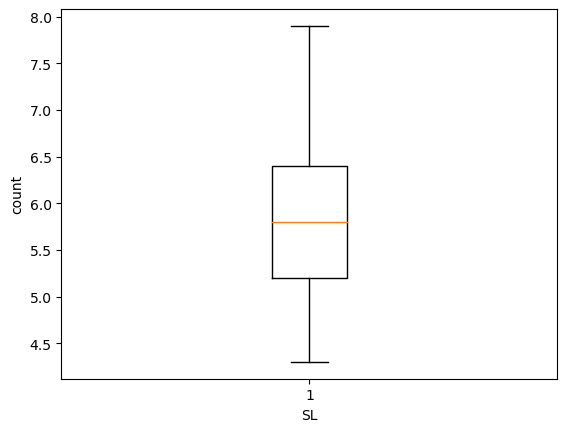

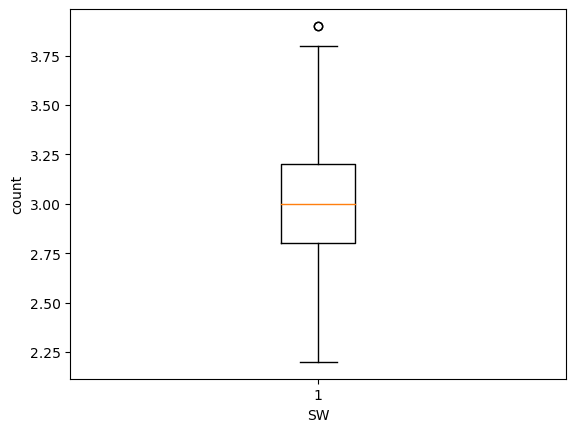

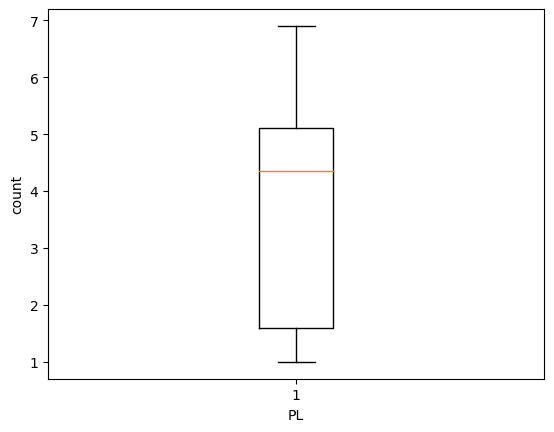

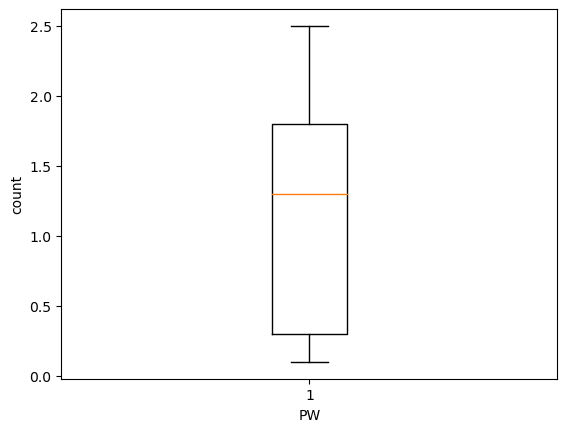

In [32]:
for col_name in col:
    if (data[col_name].dtypes=='int' or data[col_name].dtypes=='float'):
        plt.boxplot([data[col_name]])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [33]:
IQR=Q3-Q1
print("IQR",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim",low_lim)
print("up_lim",up_lim)

IQR 0.4500000000000002
low_lim 2.1249999999999996
up_lim 3.9250000000000003


In [34]:
#Findng Outlier values and storing in a list
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [35]:
outlier

[]

In [36]:
data['SW'].min()

2.2

In [37]:
data['SW'].max()

3.9

In [38]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [40]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [41]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 145, dtype: object

In [42]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)


C:\Users\santh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [45]:
#To display the classification report of model

from sklearn.metrics import classification_report

cr = classification_report(y_pred, y_test)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



In [46]:
#Next we are using KNeighbors Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [47]:
metric_k=[]
neighbors= np.arange(3,15)

In [48]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k,metric= 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

C:\Users\santh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\santh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [49]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

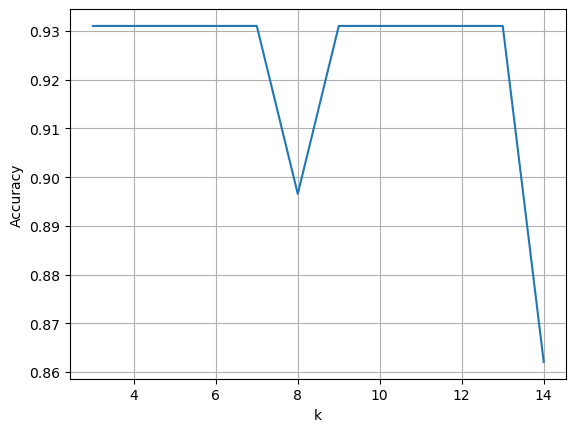

In [50]:
plt.plot(neighbors,metric_k)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [51]:
classifier = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

C:\Users\santh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
print('Accuracy=',accuracy_score(y_test,y_predictions))


Accuracy= 0.9310344827586207


In [54]:
#To display the classification report of model

from sklearn.metrics import classification_report

cr1 = classification_report(y_predictions, y_test)
print(cr1)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



In [56]:
# Create a CatBoost classifier
#pip install catboost
import catboost as cb


In [57]:
cb_clf = cb.CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1)


In [58]:
# Train the model
#cb_clf.fit(x_train, y_train)
# Fit model to training data and evaluate on validation data
cb_clf.fit(x_train, y_train, eval_set=(x_test, y_test), use_best_model=True, verbose=False)


In [59]:
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [61]:
y_test

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
122     Iris-virginica
131     Iris-virginica
113     Iris-virginica
89     Iris-versicolor
20         Iris-setosa
12         Iris-setosa
59     Iris-versicolor
133     Iris-virginica
83     Iris-versicolor
78     Iris-versicolor
40         Iris-setosa
117     Iris-virginica
138     Iris-virginica
105     Iris-virginica
106     Iris-virginica
99     Iris-versicolor
141     Iris-virginica
11         Iris-setosa
71     Iris-versicolor
35         Iris-setosa
49         Iris-setosa
55     Iris-versicolor
81     Iris-versicolor
116     Iris-virginica
Name: Classification, dtype: object

In [62]:
# Make predictions on test data
y_pred = cb_clf.predict(x_test)


In [63]:
score = cb_clf.score(x_test,y_test)
print("Score: %.2f" % score)

Score: 0.93


In [64]:
#To display the classification report of model

from sklearn.metrics import classification_report

cr2 = classification_report(y_pred, y_test)
print(cr2)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29

